In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_game = pd.read_csv('game.csv')
# on garde que la "Regular Season"
df_game = df_game[df_game['season_type'].isin(['Regular Season'])]
# on garde que les années supérieures à 2010
df_game= df_game[df_game['season_id'] >= 22010]
# on garde que les colonnes suivantes : 'season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away'
df_game = df_game.loc[:,['season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away']]
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
49418,22010,Los Angeles Lakers,W,Houston Rockets,L
49419,22010,Portland Trail Blazers,W,Phoenix Suns,L
49420,22010,Boston Celtics,W,Miami Heat,L
49421,22010,Golden State Warriors,W,Houston Rockets,L
49422,22010,New Orleans Hornets,W,Milwaukee Bucks,L
...,...,...,...,...,...
65537,22022,New York Knicks,L,Indiana Pacers,W
65538,22022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,22022,Chicago Bulls,W,Detroit Pistons,L
65540,22022,Toronto Raptors,W,Milwaukee Bucks,L


In [4]:
# conversion de season_id en année
def supprimer_premier_2(valeur):
    valeur_str = str(valeur)
    return int(valeur_str.replace('2', '', 1)) if '2' in valeur_str else valeur

df_game['season_id'] = df_game['season_id'].apply(supprimer_premier_2)
df_game['season_id'] = pd.to_datetime(df_game['season_id'], format='%Y').dt.year
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
49418,2010,Los Angeles Lakers,W,Houston Rockets,L
49419,2010,Portland Trail Blazers,W,Phoenix Suns,L
49420,2010,Boston Celtics,W,Miami Heat,L
49421,2010,Golden State Warriors,W,Houston Rockets,L
49422,2010,New Orleans Hornets,W,Milwaukee Bucks,L
...,...,...,...,...,...
65537,2022,New York Knicks,L,Indiana Pacers,W
65538,2022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,2022,Chicago Bulls,W,Detroit Pistons,L
65540,2022,Toronto Raptors,W,Milwaukee Bucks,L


In [5]:
# total des matchs 'away' gagnés par saison
df_new_game_away = df_game.groupby(['team_name_away', 'season_id'])['wl_away'].value_counts().reset_index(name='total_away')
df_new_game_away = df_new_game_away.sort_values(by=['team_name_away', 'season_id', 'wl_away'])
# on conserve que les matchs gagnés
df_new_game_away = df_new_game_away.loc[df_new_game_away['wl_away'] == 'W'].reset_index()
df_new_game_away

,index,team_name_away,season_id,wl_away,total_away
0,1,Atlanta Hawks,2010,W,20
1,2,Atlanta Hawks,2011,W,17
2,5,Atlanta Hawks,2013,W,14
3,6,Atlanta Hawks,2014,W,25
4,8,Atlanta Hawks,2015,W,21
...,...,...,...,...,...
355,711,Washington Wizards,2018,W,10
356,713,Washington Wizards,2019,W,9
357,715,Washington Wizards,2020,W,15
358,717,Washington Wizards,2021,W,14


In [6]:
# total des matchs 'home' gagnés par saison
df_new_game_home = df_game.groupby(['team_name_home', 'season_id'])['wl_home'].value_counts().reset_index(name='total_home')
df_new_game_home = df_new_game_home.sort_values(by=['team_name_home', 'season_id', 'wl_home'])
# on conserve que les matchs gagnés
df_new_game_home = df_new_game_home.loc[df_new_game_home['wl_home'] == 'W'].reset_index()
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home
0,0,Atlanta Hawks,2010,W,24
1,2,Atlanta Hawks,2011,W,23
2,4,Atlanta Hawks,2013,W,24
3,6,Atlanta Hawks,2014,W,35
4,8,Atlanta Hawks,2015,W,27
...,...,...,...,...,...
355,710,Washington Wizards,2018,W,22
356,713,Washington Wizards,2019,W,16
357,714,Washington Wizards,2020,W,19
358,716,Washington Wizards,2021,W,21


In [7]:
# on rassemble le total_away
df_new_game_home.insert(loc=len(df_new_game_home.columns), column='total_away', value=df_new_game_away['total_away'])
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away
0,0,Atlanta Hawks,2010,W,24,20
1,2,Atlanta Hawks,2011,W,23,17
2,4,Atlanta Hawks,2013,W,24,14
3,6,Atlanta Hawks,2014,W,35,25
4,8,Atlanta Hawks,2015,W,27,21
...,...,...,...,...,...,...
355,710,Washington Wizards,2018,W,22,10
356,713,Washington Wizards,2019,W,16,9
357,714,Washington Wizards,2020,W,19,15
358,716,Washington Wizards,2021,W,21,14


In [8]:
# somme des home + away
colomns_list = ['total_home', 'total_away']
df_new_game_home['somme'] = df_new_game_home[colomns_list].sum(axis=1)
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Atlanta Hawks,2010,W,24,20,44
1,2,Atlanta Hawks,2011,W,23,17,40
2,4,Atlanta Hawks,2013,W,24,14,38
3,6,Atlanta Hawks,2014,W,35,25,60
4,8,Atlanta Hawks,2015,W,27,21,48
...,...,...,...,...,...,...,...
355,710,Washington Wizards,2018,W,22,10,32
356,713,Washington Wizards,2019,W,16,9,25
357,714,Washington Wizards,2020,W,19,15,34
358,716,Washington Wizards,2021,W,21,14,35


In [9]:
# suppression des colonnes inutiles
df_new_game = df_new_game_home.loc[:,['team_name_home', 'season_id', 'somme']]
df_new_game

,team_name_home,season_id,somme
0,Atlanta Hawks,2010,44
1,Atlanta Hawks,2011,40
2,Atlanta Hawks,2013,38
3,Atlanta Hawks,2014,60
4,Atlanta Hawks,2015,48
...,...,...,...
355,Washington Wizards,2018,32
356,Washington Wizards,2019,25
357,Washington Wizards,2020,34
358,Washington Wizards,2021,35


In [10]:
df_draft_history = pd.read_csv('draft_history.csv')

In [11]:
df_draft_history = df_draft_history[df_draft_history['season'] >= 2010]
list_team = (df_draft_history.groupby(['team_city', 'team_name', 'season'])['overall_pick'].sum()/df_draft_history.groupby(['team_city', 'team_name', 'season'])['overall_pick'].count()).reset_index(name='total_pick')
list_team = list_team[(list_team['total_pick'] >= 9) & (list_team['total_pick'] <= 12)].reset_index()
list_team = list_team['team_city'] + ' ' + list_team['team_name']
list_team = list_team.value_counts().index
list_team.tolist()

['Dallas Mavericks',
 'Houston Rockets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Minnesota Timberwolves',
 'New Orleans Hornets',
 'Oklahoma City Thunder',
 'Phoenix Suns',
 'Washington Wizards']

In [12]:
list = ['Washington Wizards', 'Detroit Pistons', 'Cleveland Cavaliers', 'Phoenix Suns', 'Sacramento Kings', 'Charlotte Hornets', 'Orlando Magic']
df_selectionne = df_new_game[df_new_game['team_name_home'].isin(list)]

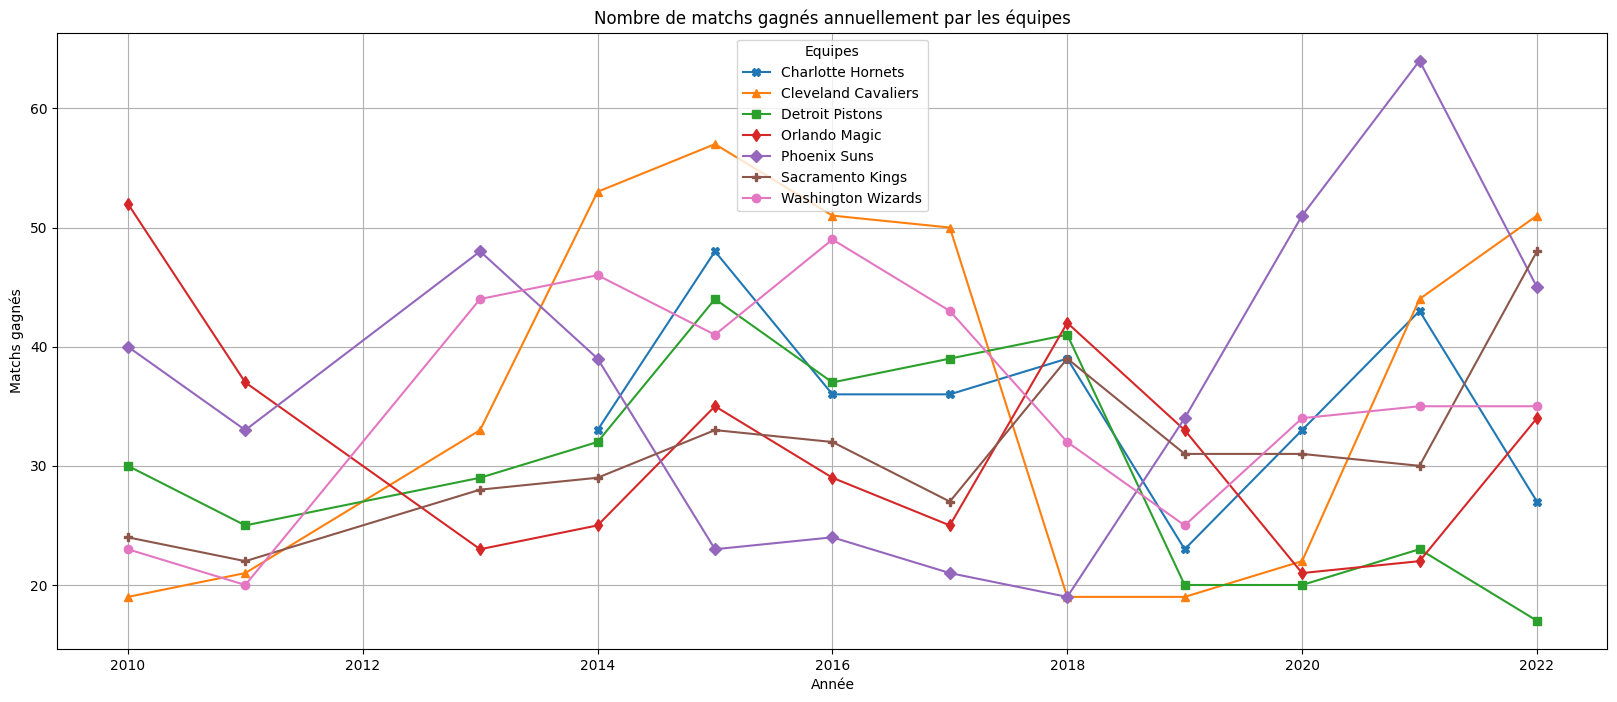

In [13]:
# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))
marqueurs = {
    'Washington Wizards': 'o',
    'Detroit Pistons': 's',
    'Cleveland Cavaliers': '^',
    'Phoenix Suns': 'D',
    'Sacramento Kings': 'P',
    'Charlotte Hornets': 'X',
    'Orlando Magic': 'd'
}
# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_selectionne.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker=marqueurs[nom], linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les équipes')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipes')
plt.grid(True)

# Afficher le graphique
plt.show()

In [14]:
df_Wizards = df_new_game[df_new_game['team_name_home'].isin(['Washington Wizards'])]

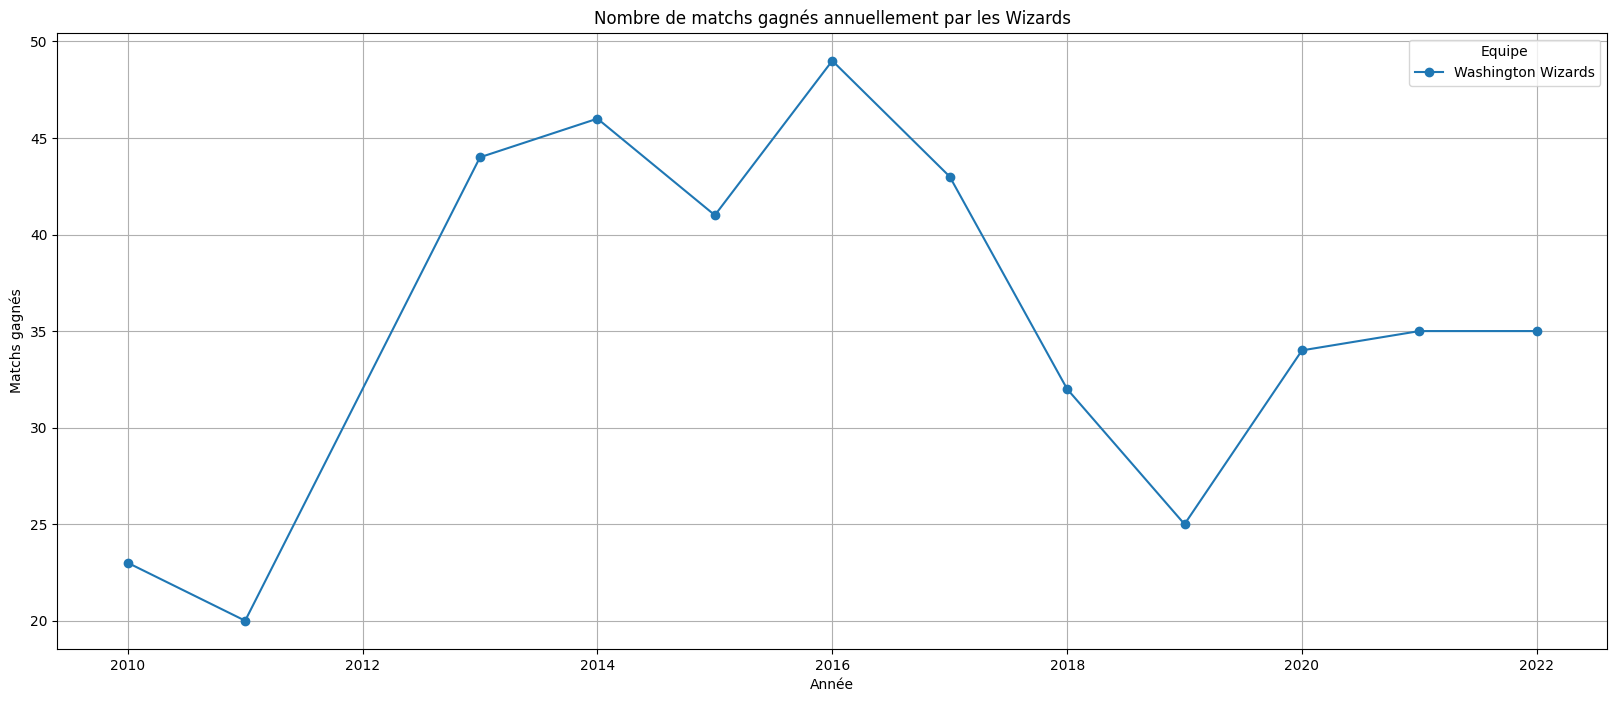

In [15]:
# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))
# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_Wizards.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker='o', linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les Wizards')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipe')
plt.grid(True)

# Afficher le graphique
plt.show()

In [16]:
# df_draft_history = df_draft_history[df_draft_history['overall_pick'] <= 14]
df_draft_Wizards = df_draft_history[df_draft_history['team_name'] == 'Wizards']
list_player = df_draft_Wizards['player_name']
list_player

7214               John Wall
7243           Lazar Hayward
7248         Nemanja Bjelica
7279              Jan Vesely
7291         Chris Singleton
7307            Shelvin Mack
7336            Bradley Beal
7365        Tomas Satoransky
7396         Otto Porter Jr.
7431            Nate Wolters
7447          Arsalan Kazemi
7472            Jerian Grant
7502             Aaron White
7648          Troy Brown Jr.
7677             Issuf Sanon
7702           Rui Hachimura
7762             Deni Avdija
7790              Vit Krejci
7828           Corey Kispert
7883            Johnny Davis
7927           Yannick Nzosa
7939           Jarace Walker
7973        Tristan Vukcevic
7988    Trayce Jackson-Davis
Name: player_name, dtype: object

In [17]:
print(df_draft_Wizards)

      person_id           player_name  season  round_number  round_pick  \
7214     202322             John Wall    2010             1           1   
7243     202351         Lazar Hayward    2010             1          30   
7248     202357       Nemanja Bjelica    2010             2           5   
7279     202686            Jan Vesely    2011             1           6   
7291     202698       Chris Singleton    2011             1          18   
7307     202714          Shelvin Mack    2011             2           4   
7336     203078          Bradley Beal    2012             1           3   
7365     203107      Tomas Satoransky    2012             2           2   
7396     203490       Otto Porter Jr.    2013             1           3   
7431     203489          Nate Wolters    2013             2           8   
7447     203529        Arsalan Kazemi    2013             2          24   
7472    1626170          Jerian Grant    2015             1          19   
7502    1626206          

In [18]:
df_common_player_info = pd.read_csv('common_player_info.csv')

In [19]:
df_Wizards_position = df_common_player_info[df_common_player_info['display_first_last'].isin(list_player)]
df_Wizards_position = df_Wizards_position.loc[:,['position', 'display_first_last']]
df_Wizards_position = df_Wizards_position.fillna('other')
df_Wizards_position

,position,display_first_last
236,Guard,Bradley Beal
302,Forward,Nemanja Bjelica
493,Guard-Forward,Troy Brown Jr.
863,Guard,Johnny Davis
864,Guard,Johnny Davis
1450,Forward,Rui Hachimura
1582,Forward,Lazar Hayward
2059,Forward,Corey Kispert
2099,Guard,Vit Krejci
2293,Guard,Shelvin Mack


In [20]:
df_draft_Wizards = df_draft_Wizards.merge(df_Wizards_position, left_on='player_name', right_on='display_first_last')
df_draft_Wizards

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag,position,display_first_last
0,202322,John Wall,2010,1,1,1,Draft,1610612764,Washington,Wizards,WAS,Kentucky,College/University,1,Guard,John Wall
1,202351,Lazar Hayward,2010,1,30,30,Draft,1610612764,Washington,Wizards,WAS,Marquette,College/University,1,Forward,Lazar Hayward
2,202357,Nemanja Bjelica,2010,2,5,35,Draft,1610612764,Washington,Wizards,WAS,KK Crvena zvezda (Serbia),Other Team/Club,1,Forward,Nemanja Bjelica
3,202686,Jan Vesely,2011,1,6,6,Draft,1610612764,Washington,Wizards,WAS,KK Partizan (Serbia),Other Team/Club,1,Forward,Jan Vesely
4,202698,Chris Singleton,2011,1,18,18,Draft,1610612764,Washington,Wizards,WAS,Florida State,College/University,1,Forward,Chris Singleton
5,202714,Shelvin Mack,2011,2,4,34,Draft,1610612764,Washington,Wizards,WAS,Butler,College/University,1,Guard,Shelvin Mack
6,203078,Bradley Beal,2012,1,3,3,Draft,1610612764,Washington,Wizards,WAS,Florida,College/University,1,Guard,Bradley Beal
7,203107,Tomas Satoransky,2012,2,2,32,Draft,1610612764,Washington,Wizards,WAS,CB Sevilla (Spain),Other Team/Club,1,Guard,Tomas Satoransky
8,203490,Otto Porter Jr.,2013,1,3,3,Draft,1610612764,Washington,Wizards,WAS,Georgetown,College/University,1,Forward,Otto Porter Jr.
9,203489,Nate Wolters,2013,2,8,38,Draft,1610612764,Washington,Wizards,WAS,South Dakota State,College/University,1,Guard,Nate Wolters


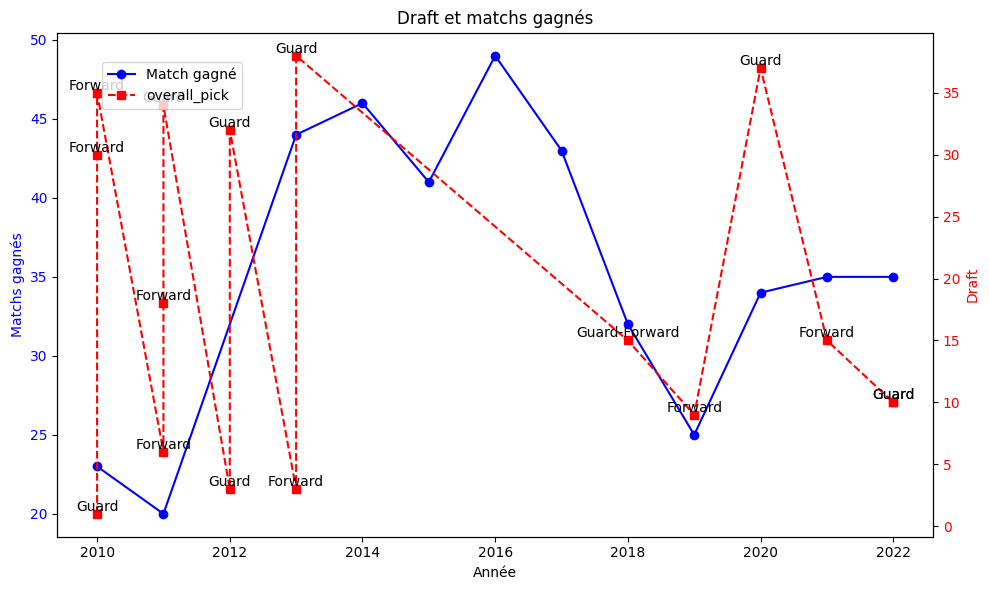

In [21]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les ventes avec l'axe y principal
ax1.plot(df_Wizards['season_id'], df_Wizards['somme'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(df_draft_Wizards['season'], df_draft_Wizards['overall_pick'], marker='s', linestyle='--', color='r', label='overall_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')


for i in range(len(df_draft_Wizards['season'])):
    plt.text(df_draft_Wizards['season'][i], df_draft_Wizards['overall_pick'][i], df_draft_Wizards['position'][i], fontsize=10, ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title('Draft et matchs gagnés')

# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Afficher le graphique
plt.show()

In [22]:
df_Wizards

,team_name_home,season_id,somme
348,Washington Wizards,2010,23
349,Washington Wizards,2011,20
350,Washington Wizards,2013,44
351,Washington Wizards,2014,46
352,Washington Wizards,2015,41
353,Washington Wizards,2016,49
354,Washington Wizards,2017,43
355,Washington Wizards,2018,32
356,Washington Wizards,2019,25
357,Washington Wizards,2020,34


In [23]:
df_draft_Wizards

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag,position,display_first_last
0,202322,John Wall,2010,1,1,1,Draft,1610612764,Washington,Wizards,WAS,Kentucky,College/University,1,Guard,John Wall
1,202351,Lazar Hayward,2010,1,30,30,Draft,1610612764,Washington,Wizards,WAS,Marquette,College/University,1,Forward,Lazar Hayward
2,202357,Nemanja Bjelica,2010,2,5,35,Draft,1610612764,Washington,Wizards,WAS,KK Crvena zvezda (Serbia),Other Team/Club,1,Forward,Nemanja Bjelica
3,202686,Jan Vesely,2011,1,6,6,Draft,1610612764,Washington,Wizards,WAS,KK Partizan (Serbia),Other Team/Club,1,Forward,Jan Vesely
4,202698,Chris Singleton,2011,1,18,18,Draft,1610612764,Washington,Wizards,WAS,Florida State,College/University,1,Forward,Chris Singleton
5,202714,Shelvin Mack,2011,2,4,34,Draft,1610612764,Washington,Wizards,WAS,Butler,College/University,1,Guard,Shelvin Mack
6,203078,Bradley Beal,2012,1,3,3,Draft,1610612764,Washington,Wizards,WAS,Florida,College/University,1,Guard,Bradley Beal
7,203107,Tomas Satoransky,2012,2,2,32,Draft,1610612764,Washington,Wizards,WAS,CB Sevilla (Spain),Other Team/Club,1,Guard,Tomas Satoransky
8,203490,Otto Porter Jr.,2013,1,3,3,Draft,1610612764,Washington,Wizards,WAS,Georgetown,College/University,1,Forward,Otto Porter Jr.
9,203489,Nate Wolters,2013,2,8,38,Draft,1610612764,Washington,Wizards,WAS,South Dakota State,College/University,1,Guard,Nate Wolters


In [31]:

df_draft_Wizards2 = df_draft_Wizards.loc[:, ['position', 'overall_pick']]
df_draft_Wizards2['team_name_home'] = df_draft_Wizards['team_city'].str.cat(df_draft_Wizards['team_name'], sep=' ')
df_draft_Wizards2['season_id'] = df_draft_Wizards['season']
df_draft_Wizards2

,position,overall_pick,team_name_home,season_id
0,Guard,1,Washington Wizards,2010
1,Forward,30,Washington Wizards,2010
2,Forward,35,Washington Wizards,2010
3,Forward,6,Washington Wizards,2011
4,Forward,18,Washington Wizards,2011
5,Guard,34,Washington Wizards,2011
6,Guard,3,Washington Wizards,2012
7,Guard,32,Washington Wizards,2012
8,Forward,3,Washington Wizards,2013
9,Guard,38,Washington Wizards,2013


In [32]:
merged_df = pd.merge(df_Wizards, df_draft_Wizards2, on=['team_name_home', 'season_id'], how='outer')
merged_df

,team_name_home,season_id,somme,position,overall_pick
0,Washington Wizards,2010,23.0,Guard,1.0
1,Washington Wizards,2010,23.0,Forward,30.0
2,Washington Wizards,2010,23.0,Forward,35.0
3,Washington Wizards,2011,20.0,Forward,6.0
4,Washington Wizards,2011,20.0,Forward,18.0
5,Washington Wizards,2011,20.0,Guard,34.0
6,Washington Wizards,2012,NaN,Guard,3.0
7,Washington Wizards,2012,NaN,Guard,32.0
8,Washington Wizards,2013,44.0,Forward,3.0
9,Washington Wizards,2013,44.0,Guard,38.0


In [33]:
merged_df['somme'] = merged_df['somme'].interpolate()
merged_df['overall_pick'] = merged_df['overall_pick'].fillna(61)
merged_df.loc[merged_df['overall_pick'] == 61, 'position'] = 'Nothing'
merged_df

,team_name_home,season_id,somme,position,overall_pick
0,Washington Wizards,2010,23.0,Guard,1.0
1,Washington Wizards,2010,23.0,Forward,30.0
2,Washington Wizards,2010,23.0,Forward,35.0
3,Washington Wizards,2011,20.0,Forward,6.0
4,Washington Wizards,2011,20.0,Forward,18.0
5,Washington Wizards,2011,20.0,Guard,34.0
6,Washington Wizards,2012,28.0,Guard,3.0
7,Washington Wizards,2012,36.0,Guard,32.0
8,Washington Wizards,2013,44.0,Forward,3.0
9,Washington Wizards,2013,44.0,Guard,38.0


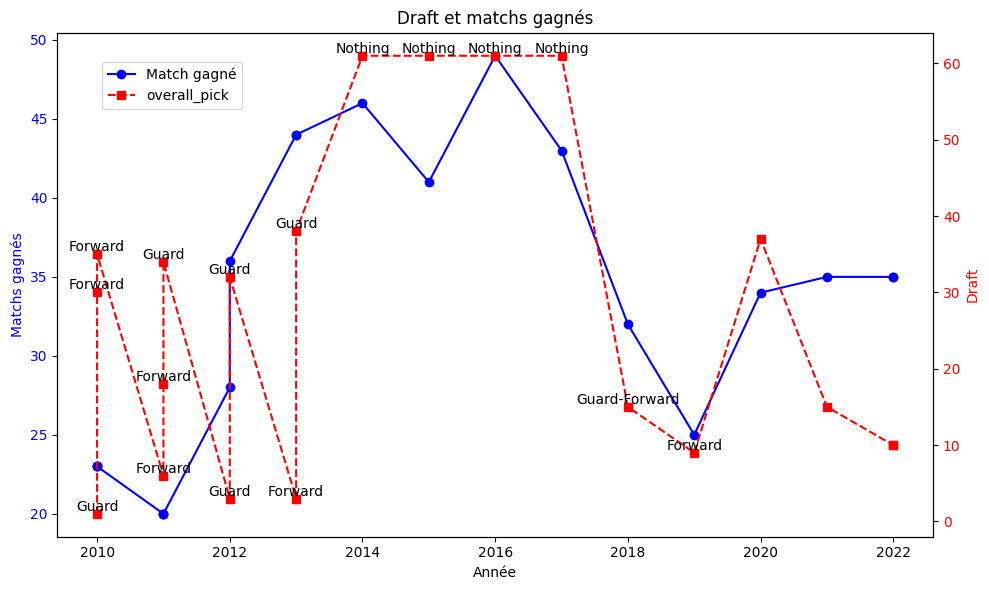

In [34]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les ventes avec l'axe y principal
ax1.plot(merged_df['season_id'], merged_df['somme'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(merged_df['season_id'], merged_df['overall_pick'], marker='s', linestyle='--', color='r', label='overall_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')


for i in range(len(df_draft_Wizards['season'])):
    plt.text(merged_df['season_id'][i], merged_df['overall_pick'][i], merged_df['position'][i], fontsize=10, ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title('Draft et matchs gagnés')

# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Afficher le graphique
plt.show()

In [35]:
merged_df['season_id'] = pd.to_datetime(merged_df['season_id'].astype(str) + '-06-30')
merged_df['season_id']

0    2010-06-30
1    2010-06-30
2    2010-06-30
3    2011-06-30
4    2011-06-30
5    2011-06-30
6    2012-06-30
7    2012-06-30
8    2013-06-30
9    2013-06-30
10   2014-06-30
11   2015-06-30
12   2016-06-30
13   2017-06-30
14   2018-06-30
15   2019-06-30
16   2020-06-30
17   2021-06-30
18   2022-06-30
19   2022-06-30
Name: season_id, dtype: datetime64[ns]

In [36]:
merged_df.corr(numeric_only=bool)['somme'].sort_values()

overall_pick    0.546958
somme           1.000000
Name: somme, dtype: float64

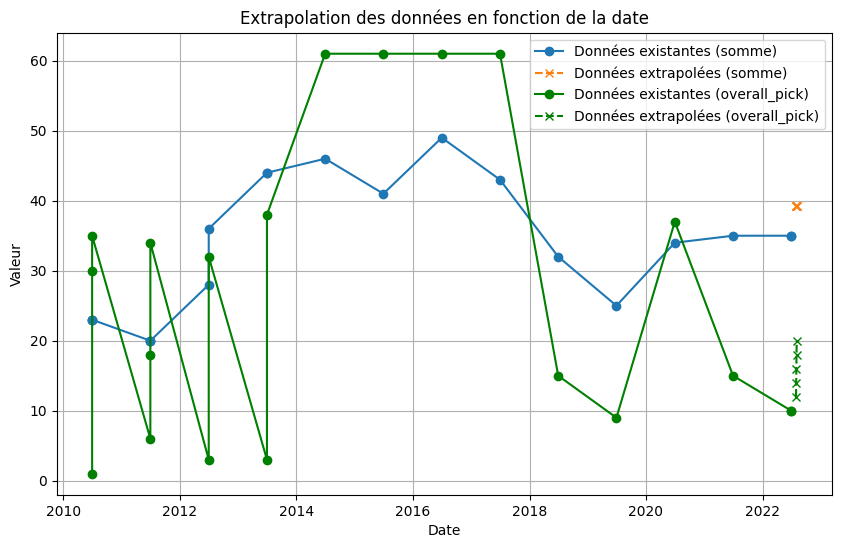

    season_id      somme  overall_pick       position
0  2010-06-30  23.000000           1.0          Guard
1  2010-06-30  23.000000          30.0        Forward
2  2010-06-30  23.000000          35.0        Forward
3  2011-06-30  20.000000           6.0        Forward
4  2011-06-30  20.000000          18.0        Forward
5  2011-06-30  20.000000          34.0          Guard
6  2012-06-30  28.000000           3.0          Guard
7  2012-06-30  36.000000          32.0          Guard
8  2013-06-30  44.000000           3.0        Forward
9  2013-06-30  44.000000          38.0          Guard
10 2014-06-30  46.000000          61.0        Nothing
11 2015-06-30  41.000000          61.0        Nothing
12 2016-06-30  49.000000          61.0        Nothing
13 2017-06-30  43.000000          61.0        Nothing
14 2018-06-30  32.000000          15.0  Guard-Forward
15 2019-06-30  25.000000           9.0        Forward
16 2020-06-30  34.000000          37.0          Guard
17 2021-06-30  35.000000    

In [37]:


import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# Création d'un DataFrame d'exemple avec des dates et des valeurs
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, 35, 40],
    'value2': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

df = merged_df


# Convertir les dates en nombres pour la régression
df['date_num'] = pd.to_numeric(df['season_id'])
#df['date_num'] = pd.to_datetime(merged_df['season_id'].astype(str) + '-01-01')

# Préparer les données pour la régression multivariée
X = df[['date_num', 'overall_pick']]
y = df['somme']

# Ajuster une régression linéaire multivariée aux données existantes
model = LinearRegression()
model.fit(X, y)

# Définir une plage de dates pour extrapoler
future_dates = pd.date_range(start=df['season_id'].iloc[-1] + timedelta(days=30), periods=5, freq='D')
future_dates_num = pd.to_numeric(future_dates)

# Créer des valeurs futures pour 'value2' en les augmentant linéairement
future_values2 = np.linspace(df['overall_pick'].iloc[-1] + 2, df['overall_pick'].iloc[-1] + 2 * 5, 5)

# Préparer les données futures pour la prédiction
future_X = pd.DataFrame({
    'date_num': future_dates_num,
    'overall_pick': future_values2
})

# Extrapoler les valeurs futures en utilisant le modèle ajusté
future_values = model.predict(future_X)

# Créer des catégories futures basées sur une alternance
future_categories = ['A' if i % 2 == 0 else 'B' for i in range(len(future_dates))]

# Créer un DataFrame pour les dates futures
future_df = pd.DataFrame({
    'season_id': future_dates,
    'somme': future_values,
    'overall_pick': future_values2,
    'position': future_categories
})

# Combiner les données existantes et extrapolées
combined_df = pd.concat([df[['season_id', 'somme', 'overall_pick', 'position']], future_df])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df['season_id'], df['somme'], label='Données existantes (somme)', marker='o')
plt.plot(future_df['season_id'], future_df['somme'], label='Données extrapolées (somme)', linestyle='--', marker='x')
plt.plot(df['season_id'], df['overall_pick'], label='Données existantes (overall_pick)', marker='o', color='green')
plt.plot(future_df['season_id'], future_df['overall_pick'], label='Données extrapolées (overall_pick)', linestyle='--', marker='x', color='green')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Extrapolation des données en fonction de la date')
plt.legend()
plt.grid(True)
plt.show()

print(combined_df)
